In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
profile = pd.read_csv("profiles.csv")
#shape of profile
print(profile.shape)


(59946, 31)


In [3]:
profile = profile.dropna().reset_index(drop = True)
print(profile.shape)

(4407, 31)


In [4]:
print(profile.columns)
print(profile.info())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4407 non-null   int64  
 1   body_type    4407 non-null   object 
 2   diet         4407 non-null   object 
 3   drinks       4407 non-null   object 
 4   drugs        4407 non-null   object 
 5   education    4407 non-null   object 
 6   essay0       4407 non-null   object 
 7   essay1       4407 non-null   object 
 8   essay2       4407 non-null   object 
 9   essay3       4407 non-null   object 
 10  essay4

In [5]:
#checking value counts of necessary features
categorical_features = ['body_type', 'diet', 'drinks', 'drugs', 'education','ethnicity', 'income', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'status']
for i in categorical_features:
    print(profile[i].value_counts())
    print("______________________________")

body_type
average           1207
fit                906
athletic           799
curvy              448
thin               348
a little extra     322
skinny             125
full figured       102
overweight          60
used up             40
jacked              40
rather not say      10
Name: count, dtype: int64
______________________________
diet
mostly anything        2257
strictly anything       636
anything                522
mostly vegetarian       441
mostly other            155
strictly vegetarian     125
strictly other           68
vegetarian               45
mostly vegan             41
other                    39
strictly vegan           35
vegan                    16
mostly kosher            13
mostly halal              8
strictly kosher           2
strictly halal            2
kosher                    2
Name: count, dtype: int64
______________________________
drinks
socially       2958
rarely          581
often           396
not at all      386
very often       52
desperately 

## Cleaning + Binning the data to increase the speed of training


In [6]:
#Education
# 1. Detect dropped out
dropped = profile["education"].str.contains(r"^dropped out of", case=False, regex=True)

# 2. Strip the leading status phrases
edu = profile["education"].str.replace(
    r"^(graduated from|working on|dropped out of)\s+",
    "",
    regex=True,
    case=False
).str.lower()

# 3. Normalize to degree categories
edu = (
    edu.str.replace(r"college/university", "bachelors", regex=True)
       .str.replace(r"two[- ]?year college", "associates", regex=True)
       .str.replace(r"masters program", "masters", regex=True)
       .str.replace(r"ph\.?d program", "phd", regex=True)
       .str.replace(r"law school", "law", regex=True)
       .str.replace(r"med school", "medical", regex=True)
       .str.replace(r"high school", "high school", regex=True)
       .str.replace(r"space camp", "space camp", regex=True)
)

# 4. Add "(dropped out)" back into the same column
profile["education"] = edu + dropped.map(lambda x: " (dropped out)" if x else "")

print(profile.education.value_counts())

education
bachelors                    2358
masters                       828
associates                    332
high school                   187
phd                           162
bachelors (dropped out)       120
space camp                    119
law                           111
space camp (dropped out)       71
medical                        53
associates (dropped out)       21
masters (dropped out)          18
high school (dropped out)      15
phd (dropped out)              10
law (dropped out)               2
Name: count, dtype: int64


In [7]:
#Religion
profile["religion"] = profile["religion"].str.extract(r"^(\w+)", expand=False).str.lower()
print(profile.religion.value_counts())

religion
other           987
agnosticism     972
atheism         781
christianity    637
catholicism     489
judaism         266
buddhism        232
hinduism         29
islam            14
Name: count, dtype: int64


In [8]:
#Sign
profile["sign"] = profile["sign"].str.extract(r"^(\w+)", expand=False).str.lower()
print(profile.sign.value_counts())

sign
cancer         416
gemini         400
virgo          394
leo            392
aries          390
sagittarius    378
libra          370
scorpio        352
taurus         342
pisces         331
capricorn      322
aquarius       320
Name: count, dtype: int64


In [25]:
#status
profile["status"] = profile["status"].apply(lambda x : "single" if x == "available" else x)
profile["status"] = profile['status'].apply(lambda x : "seeing someone" if x == "married" else x)
print(profile.status.value_counts())

status
single            4252
seeing someone     155
Name: count, dtype: int64


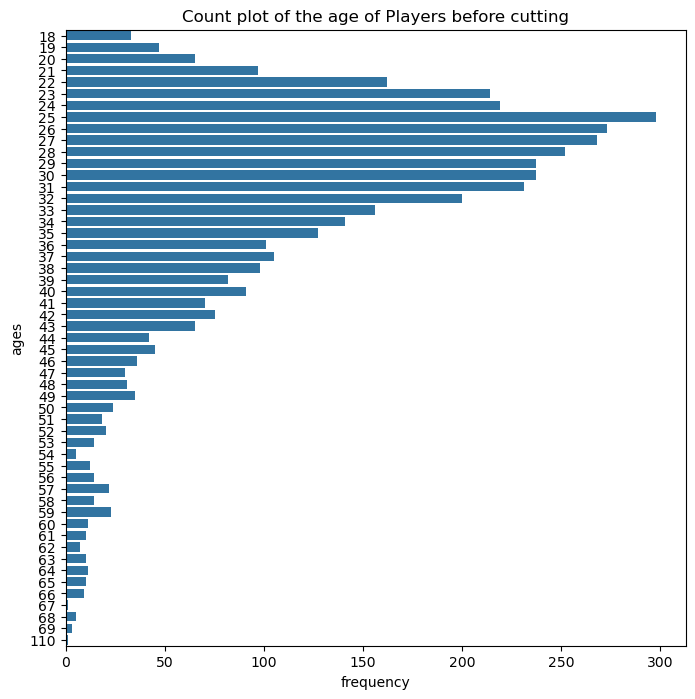

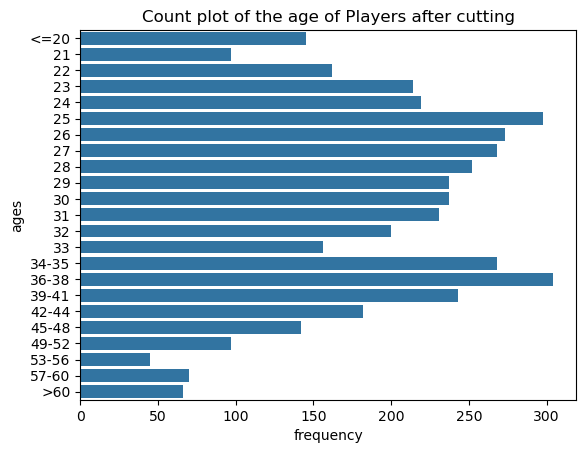

<Figure size 640x480 with 0 Axes>

In [10]:
#Age

#checking the distribution of ages in all acceptable profiles
profile["age"] = pd.read_csv("profiles.csv")["age"]
plt.figure(figsize = (8, 8))
sns.countplot(data = profile, y = 'age')
plt.title("Count plot of the age of Players before cutting")
plt.ylabel("ages")
plt.xlabel("frequency")


plt.show()
plt.clf()

profile['age'] = pd.cut(profile['age'], [0, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 38, 41, 44, 48, 52, 56, 60, 70],
                        labels= ["<=20", '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', 
                                 '32', '33', "34-35", "36-38", "39-41", "42-44", "45-48", "49-52","53-56", "57-60", ">60"])
                        
sns.countplot(data = profile, y = 'age')
plt.title("Count plot of the age of Players after cutting")
plt.ylabel("ages")
plt.xlabel("frequency")

plt.show()
plt.clf()

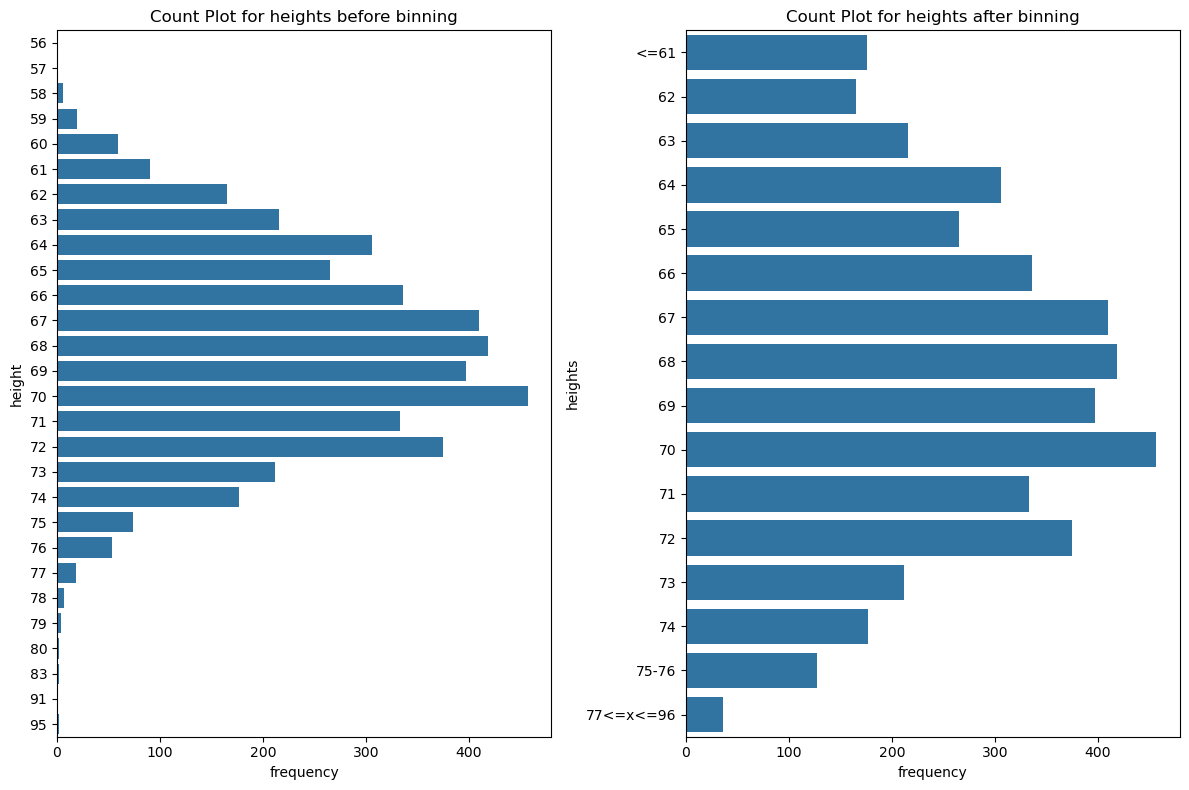

<Figure size 640x480 with 0 Axes>

In [11]:
#Height
profile["height"] = pd.read_csv("profiles.csv")["height"]
profile['height'] = profile['height'].astype('int')

fig, (ax1, ax2) = plt.subplots(1,2,figsize= (12,8))
sns.countplot(data = profile, y = "height", ax = ax1)
ax1.set_xlabel("frequency")
ax1.set_ylabel("height")
ax1.set_title("Count Plot for heights before binning")


profile['height'] = pd.cut(profile['height'], [0,61,62,63,64, 65, 66, 67, 68,69,70,71,72,73,74,76,96], labels = ["<=61", "62", "63", "64", "65", "66", "67", "68",
                                                                                                            "69", "70", "71", "72", "73", "74", "75-76", "77<=x<=96"])
sns.countplot(data = profile, y = 'height', ax= ax2)
plt.title("Count Plot for heights after binning")
plt.xlabel("frequency")
plt.ylabel("heights")

plt.tight_layout()
plt.show()
plt.clf()

# Encoding + Feature Selection
## All columns ::
##### Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
 #####      'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
#####       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
#####       'last_online', 'location', 'offspring', 'orientation', 'pets',
#####       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
 #####     dtype='object')

## Data ::
#### categorical : bodytype, diet, drinks, drugs, education, ethnicity, job, location, offspring, orientation, pets, religion, sex, sign, smokes,
#### speaks, status
#### numerical : age, height, income, last_online, 
#### sentences : Essay 1-10


## Encoding ::
#### Target Encoding : ethnicity, location, speaks
#### OrdinalEncoder : education
#### onehotencoding : bodytype, diet, drinks, drugs, job, offspring, orientation, pets, religion, sex, sign, smokes, status

## Data Transformation ::
#### Standardization : All

## Feature Selection ::
#### Filter Methods:
##### Variance Threshold, Pearson Correlation (feature vs target), multicollinearity
#### Wrapper Method:
##### Recursive Feature Elimination

## Model to train :: Stacking + Boosting Ensemble Model
#### Base Model : LogisticRegression with Lasso, KNN, DecisionTree, 
#### Final Model : PCA


In [12]:
print(profile.job.value_counts())

job
other                                634
student                              460
artistic / musical / writer          414
science / tech / engineering         357
sales / marketing / biz dev          352
medicine / health                    338
computer / hardware / software       336
education / academia                 296
executive / management               209
entertainment / media                191
banking / financial / real estate    153
hospitality / travel                 132
construction / craftsmanship         105
law / legal services                 104
clerical / administrative             94
political / government                66
transportation                        40
unemployed                            38
rather not say                        34
retired                               33
military                              21
Name: count, dtype: int64


In [13]:

profile_essay = profile[['essay0',
'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
'essay8', 'essay9']]

In [14]:
#TargetEncoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder

X = profile[['ethnicity', 'location', 'speaks']].copy(deep = True)
y = profile[['status']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 10)
T_encoder = TargetEncoder(smooth = 'auto')
X_train_enc = pd.DataFrame(T_encoder.fit_transform(x_train, y_train))
X_test_enc = pd.DataFrame(T_encoder.transform(x_test))

profile_Target = pd.concat([X_train_enc, X_test_enc])
profile_Target.columns = T_encoder.get_feature_names_out()

print(profile_Target.head())

   ethnicity_married  ethnicity_seeing someone  ethnicity_single  \
0           0.005672                  0.031764          0.962565   
1           0.004035                  0.020190          0.975774   
2           0.006285                  0.028001          0.965713   
3           0.005672                  0.031764          0.962565   
4           0.005672                  0.031764          0.962565   

   location_married  location_seeing someone  location_single  speaks_married  \
0          0.003266                 0.029389         0.967345        0.004577   
1          0.003261                 0.027712         0.969027        0.006810   
2          0.003258                 0.028503         0.968238        0.004965   
3          0.003266                 0.029389         0.967345        0.006685   
4          0.000000                 0.000000         1.000000        0.006685   

   speaks_seeing someone  speaks_single  
0               0.029751       0.965672  
1               0.02

In [15]:
#OrdinalEncoding
from sklearn.preprocessing import OrdinalEncoder

X = profile[["education"]].copy(deep = True)
y = profile[["status"]]

category_order = [['high school (dropped out)','high school','associates (dropped out)','associates','bachelors (dropped out)','bachelors','masters (dropped out)','masters','phd (dropped out)',
'phd','law (dropped out)','law','medical','space camp (dropped out)','space camp']]

O_encoder = OrdinalEncoder(categories = category_order)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state = 10)
x_train_enc = pd.DataFrame(O_encoder.fit_transform(x_train))
x_test_enc = pd.DataFrame(O_encoder.transform(x_test))

X_joined = pd.concat([x_train_enc, x_test_enc]).reset_index(drop = True)
X_joined.columns = ["education"]

profile_TO = profile_Target.reset_index(drop = True)
profile_TargetOrdinal = pd.concat([profile_TO, X_joined], axis = 1).reset_index(drop = True)
print(profile_TargetOrdinal.head())


   ethnicity_married  ethnicity_seeing someone  ethnicity_single  \
0           0.005672                  0.031764          0.962565   
1           0.004035                  0.020190          0.975774   
2           0.006285                  0.028001          0.965713   
3           0.005672                  0.031764          0.962565   
4           0.005672                  0.031764          0.962565   

   location_married  location_seeing someone  location_single  speaks_married  \
0          0.003266                 0.029389         0.967345        0.004577   
1          0.003261                 0.027712         0.969027        0.006810   
2          0.003258                 0.028503         0.968238        0.004965   
3          0.003266                 0.029389         0.967345        0.006685   
4          0.000000                 0.000000         1.000000        0.006685   

   speaks_seeing someone  speaks_single  education  
0               0.029751       0.965672        5.0 

In [16]:
#One-Hot Encoding
Temp_DF = profile[['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes']].copy(deep = True)
Temp_DF["income"] = Temp_DF.loc[:, ["income"]].astype("str")


OH_Encoding_Matrix = pd.get_dummies(Temp_DF, drop_first = True) 

profile_TOOHE = OH_Encoding_Matrix.reset_index(drop = True)

#print(OH_Encoding_Matrix.head())
print(len(profile_TOOHE.columns))

#merging rows together
profile_TargetOrdinalHot = pd.concat([profile_TargetOrdinal, profile_TOOHE], axis=1)
print(len(profile_TargetOrdinalHot.columns))
print(profile_TargetOrdinalHot.head())



275
285
   ethnicity_married  ethnicity_seeing someone  ethnicity_single  \
0           0.005672                  0.031764          0.962565   
1           0.004035                  0.020190          0.975774   
2           0.006285                  0.028001          0.965713   
3           0.005672                  0.031764          0.962565   
4           0.005672                  0.031764          0.962565   

   location_married  location_seeing someone  location_single  speaks_married  \
0          0.003266                 0.029389         0.967345        0.004577   
1          0.003261                 0.027712         0.969027        0.006810   
2          0.003258                 0.028503         0.968238        0.004965   
3          0.003266                 0.029389         0.967345        0.006685   
4          0.000000                 0.000000         1.000000        0.006685   

   speaks_seeing someone  speaks_single  education  ...  sign_libra  \
0               0.029751 

In [17]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.01)
selector.fit_transform(profile_TargetOrdinalHot)
indices = selector.get_support(indices = True)
Variance_profile = profile_TargetOrdinalHot.iloc[:,indices].copy(deep = True)
print(Variance_profile.shape)


(4407, 146)


In [18]:
#DateTIme
profile['last_online_dt'] = pd.to_datetime(profile['last_online'], format='%Y-%m-%d-%H-%M')

TempDF = profile["last_online_dt"].copy(deep = True)

Variance_profile.loc[:, "online_year"] = TempDF.dt.year
Variance_profile.loc[:, 'online_month'] = TempDF.dt.month
Variance_profile.loc[:, 'online_day'] = TempDF.dt.day
Variance_profile.loc[:, 'online_hour'] = TempDF.dt.hour
Variance_profile.loc[:, 'online_minute'] = TempDF.dt.minute

print(Variance_profile.shape)
print(Variance_profile.online_year.head(10))
print(profile.last_online_dt.head())

(4407, 151)
0    2012
1    2012
2    2012
3    2012
4    2012
5    2012
6    2012
7    2012
8    2012
9    2012
Name: online_year, dtype: int32
0   2012-06-28 20:30:00
1   2012-06-27 21:41:00
2   2012-06-28 15:22:00
3   2012-05-28 15:18:00
4   2012-06-29 06:59:00
Name: last_online_dt, dtype: datetime64[ns]


In [27]:
#Pearson Correlation removing multicollinearity

def removeCorrelated(df, threshold):
    corr_matrix = df.corr(method = 'pearson').abs()

    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))
    dropped_columns = []

    for col in upper_triangle.columns:
        if any(upper_triangle[col] > threshold):
            dropped_columns.append(col)

    return df.drop(columns = dropped_columns)

Correlated_profile = removeCorrelated(Variance_profile, 0.9)
print(Correlated_profile.shape)
print(Correlated_profile.head())
#No features are multicollinear

y = profile["status"]
#Pearson Select KBest features that best correlate with the 'status'
from sklearn.feature_selection import SelectKBest, f_classif
selectKBest = SelectKBest(score_func = f_classif, k = 125)
selectKBest.fit_transform(Correlated_profile, y)
indicesKBest = selectKBest.get_support()

KBest_profile = Correlated_profile.loc[:, indicesKBest]
print(KBest_profile.shape)
print(indicesKBest)

(4407, 151)
   education  age_21  age_22  age_23  age_24  age_25  age_26  age_27  age_28  \
0        5.0   False    True   False   False   False   False   False   False   
1        5.0   False   False   False   False   False   False   False   False   
2        5.0   False   False   False   False   False   False   False   False   
3        7.0   False   False    True   False   False   False   False   False   
4        7.0   False   False   False   False   False   False   False   False   

   age_29  ...  sign_virgo  smokes_sometimes  smokes_trying to quit  \
0   False  ...       False              True                  False   
1   False  ...       False             False                  False   
2   False  ...       False             False                  False   
3   False  ...       False             False                  False   
4    True  ...       False             False                  False   

   smokes_when drinking  smokes_yes  online_year  online_month  online_day  \
0 

In [23]:
#Standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Standard_profile_np = scaler.fit_transform(KBest_profile)
Standard_profile = pd.DataFrame(Standard_profile_np, columns = KBest_profile.columns)
print(Standard_profile.shape)
print(Standard_profile.head())

(4407, 125)
   education    age_21    age_23    age_24    age_25    age_26   age_27  \
0  -0.296554 -0.150019 -0.225915 -0.228675 -0.269302 -0.256978 -0.25446   
1  -0.296554 -0.150019 -0.225915 -0.228675 -0.269302 -0.256978 -0.25446   
2  -0.296554 -0.150019 -0.225915 -0.228675 -0.269302 -0.256978 -0.25446   
3   0.479523 -0.150019  4.426450 -0.228675 -0.269302 -0.256978 -0.25446   
4   0.479523 -0.150019 -0.225915 -0.228675 -0.269302 -0.256978 -0.25446   

     age_28    age_29    age_31  ...  sign_scorpio  sign_taurus  \
0 -0.246272 -0.238400 -0.235194  ...     -0.294629    -0.290057   
1 -0.246272 -0.238400 -0.235194  ...     -0.294629    -0.290057   
2 -0.246272 -0.238400 -0.235194  ...     -0.294629    -0.290057   
3 -0.246272 -0.238400 -0.235194  ...     -0.294629    -0.290057   
4 -0.246272  4.194632 -0.235194  ...     -0.294629    -0.290057   

   smokes_sometimes  smokes_trying to quit  smokes_when drinking  smokes_yes  \
0          3.667312              -0.185106            

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model = RandomForestClassifier(n_estimators = 15, max_depth = 20, max_features = 15, bootstrap = True, random_state = 10, n_jobs = -1)
rfe = RFE(model, n_features_to_select = 90)
x_train, x_test, y_train, y_test = train_test_split(KBest_profile, y, test_size = .2, random_state = 10)
rfe.fit(x_train, y_train)

selected_indices = rfe.support_
RFE_profile = Standard_profile.loc[:, selected_indices]
print(RFE_profile.shape)
print(RFE_profile.head())

(4407, 90)
   education    age_21    age_23    age_25    age_28    age_29    age_31  \
0  -0.296554 -0.150019 -0.225915 -0.269302 -0.246272 -0.238400 -0.235194   
1  -0.296554 -0.150019 -0.225915 -0.269302 -0.246272 -0.238400 -0.235194   
2  -0.296554 -0.150019 -0.225915 -0.269302 -0.246272 -0.238400 -0.235194   
3   0.479523 -0.150019  4.426450 -0.269302 -0.246272 -0.238400 -0.235194   
4   0.479523 -0.150019 -0.225915 -0.269302 -0.246272  4.194632 -0.235194   

     age_32    age_33  age_34-35  ...  sign_pisces  sign_scorpio  sign_taurus  \
0 -0.218036 -0.191565  -0.254460  ...    -0.284969     -0.294629    -0.290057   
1 -0.218036 -0.191565   3.929889  ...     3.509159     -0.294629    -0.290057   
2 -0.218036 -0.191565  -0.254460  ...    -0.284969     -0.294629    -0.290057   
3 -0.218036 -0.191565  -0.254460  ...    -0.284969     -0.294629    -0.290057   
4 -0.218036 -0.191565  -0.254460  ...     3.509159     -0.294629    -0.290057   

   smokes_sometimes  smokes_trying to quit  s

# Training the Base Models

In [49]:
#Naive Bayes Classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.pipeline import make_pipeline

X = profile_essay.astype(str).agg(" ".join, axis=1)

y = y.reset_index(drop=True)

model_bayes = make_pipeline(
    CountVectorizer(),
    MultinomialNB()
)

k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 10)

bayes_proba = cross_val_predict(
    estimator=model_bayes,
    X=X,
    y=y,
    cv=k_fold,
    method="predict_proba",
    n_jobs=-1
)

In [55]:
model_bayes.fit(X,y)
bayes_labels = model_bayes.named_steps['multinomialnb'].classes_
temp_df = pd.DataFrame(bayes_proba, columns = bayes_labels)
print(temp_df.head())
bayes_data = temp_df['single'].copy(deep=True)

   seeing someone  single
0    2.303619e-61     1.0
1    3.197066e-79     1.0
2    3.275684e-60     1.0
3    6.144981e-26     1.0
4    8.672490e-10     1.0


In [58]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 1000, C = .5)

logistic_proba = cross_val_predict(estimator = model_logistic, X = RFE_profile, y=y, cv=k_fold, method = 'predict_proba', n_jobs = -1)

model_logistic.fit(RFE_profile, y)

logistic_labels = model_logistic.classes_

temp_df = pd.DataFrame(logistic_proba, columns = logistic_labels)

print(temp_df.head())

logistic_data = temp_df["single"].copy(deep=True)


   seeing someone    single
0        0.027780  0.972220
1        0.011763  0.988237
2        0.018681  0.981319
3        0.095729  0.904271
4        0.009300  0.990700


In [61]:
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 7)
KNN_proba = cross_val_predict(estimator = model_KNN, X = RFE_profile, y=y, cv = k_fold, method = 'predict_proba', n_jobs = -1)
model_KNN.fit(RFE_profile, y)
KNN_labels = model_KNN.classes_

temp_df = pd.DataFrame(KNN_proba, columns = KNN_labels)
print(temp_df.head())

KNN_data = temp_df["single"].copy(deep=True)


   seeing someone    single
0        0.000000  1.000000
1        0.142857  0.857143
2        0.000000  1.000000
3        0.000000  1.000000
4        0.000000  1.000000


In [64]:
#Decision Tree Classifier

model_DTC = DecisionTreeClassifier(max_depth = 20, max_features = 20, random_state = 10)
DTC_proba = cross_val_predict(estimator = model_DTC, X = RFE_profile, y=y, cv = k_fold, method = 'predict_proba', n_jobs = -1)
model_DTC.fit(RFE_profile, y)
DTC_labels = model_DTC.classes_

temp_df = pd.DataFrame(DTC_proba, columns = DTC_labels)
print(temp_df.head())
DTC_data = temp_df["single"].copy(deep=True)


   seeing someone    single
0        0.039216  0.960784
1        0.000000  1.000000
2        0.000000  1.000000
3        0.000000  1.000000
4        0.000000  1.000000


In [66]:
X_final = pd.concat([RFE_profile, bayes_data, logistic_data, KNN_data, DTC_data], axis = 1)
from sklearn.preprocessing import LabelEncoder
L_encoder = LabelEncoder()
y_final = pd.DataFrame(L_encoder.fit_transform(y))
print(y_final.value_counts())

0
1    4252
0     155
Name: count, dtype: int64


## Training Final Model (Gradient Boosting)


In [71]:
# Choosing the best parameters for the final model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

y_final_flat = y_final.values.ravel()

GBClassifier = GradientBoostingClassifier(random_state = 10)
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator = GBClassifier,
    param_grid = params,
    cv=5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 2
)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final_flat, test_size = 0.2, random_state = 10)

grid.fit(X_train, y_train)

Optimized_GB_model = grid.best_estimator_

print("Best Score: " + str(grid.best_score_))




Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Score: 0.9639716312056738


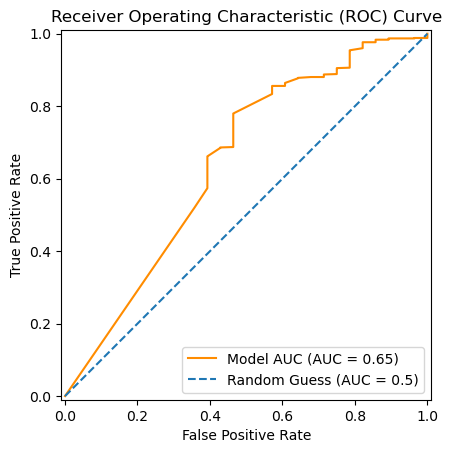

In [84]:
# Visualizing the Receiver Operating Characteristic
from sklearn.metrics import RocCurveDisplay
y_proba = Optimized_GB_model.predict_proba(X_test)[:,1]

RocCurveDisplay.from_predictions(
    y_test, 
    y_proba, 
    name="Model AUC",
    color="darkorange"
)

plt.plot([0, 1], [0, 1], linestyle = "dashed", label="Random Guess (AUC = 0.5)")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


In [99]:
#Choosing the best threshold
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_proba)

j_scores = tpr - fpr

best_threshold = threshold[np.argmax(j_scores)]


(882,)


In [103]:
#Redefining the type of y_pred
y_pred = np.where(y_proba > best_threshold, 1, 0)
print(type(y_test))
print(type(y_pred))

#Checking the accuracy of our overall model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy score is: " + str(accuracy))
print("Precision score is: " + str(precision))
print("Recall score is: " + str(recall))
print("F1 score is: " + str(f1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy score is: 0.7709750566893424
Precision score is: 0.9808259587020649
Recall score is: 0.7786885245901639
F1 score is: 0.8681462140992167


## Conclusion
#### Our code shows a high level of precision, meaning that if it predicts someone as single, they are most probably single. However, this model has a below-par recall score, which means that it misses out on a lot of individuals

#### Our accuracy score and F1 score indicate that this model is not quite excellent yet, but is at the border between good and wonderful.

## Application
#### This is useful for our dating app since we can predict their status based on the information that they give us. In case they forgot or are trying to hide their status in their profiles, our model can help unravel their status. However, since only our precision is close to 100% in accuracy, it is best to only update their status automatically if our model predicts them to be single, as we do not want to accidentally label someone as taken when they are not.

## How to improve
#### There was a lot of missing data within the CSV file, which drastically reduced the amount of data we could work with. There was also a huge disparity between the data of someone single vs someone who was taken. I would suggest hosting a survey on non-single individuals to enrich the variance between our target data.